(-1.0, 1.5)

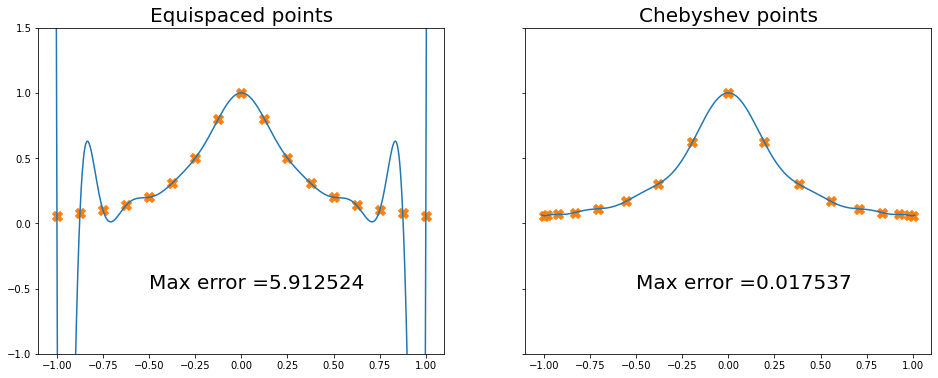

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from numpy import polyfit, polyval

N = 16
xx = np.linspace(-1.01,1.01,1000)

fig, ax = plt.subplots(1,2,sharex=True,sharey=True,figsize=(16,6))

for i in [1,2]:
  if i == 1:
    s = 'Equispaced points'
    x = -1 + 2 * np.arange(0,N+1,1)/N
    x1 = -1 + 2 * np.arange(0,16+1,1)/16
  else:
    s = 'Chebyshev points'
    x = np.cos(np.pi*np.arange(0,N+1,1)/N)
    x1 = np.cos(np.pi*np.arange(0,16+1,1)/16)
  u = 1 / (1 + 16 * x**2)
  uu = 1 / (1 + 16 * xx**2)
  u1 = 1 / (1 + 16 * x1**2)
  p = polyfit(x,u,N)
  pp = polyval(p,xx)
  ax[i-1].scatter(x1,u1,marker='o',s=20)
  ax[i-1].scatter(x,u,marker='X',s=100)
  ax[i-1].plot(xx,pp)
  ax[i-1].set_title(s,fontsize=20)
  error = max(abs(uu-pp))
  ax[i-1].text(-0.5,-0.5,'Max error ='+str(round(error,6)),fontsize=20)

plt.xlim(-1-0.1,1+0.1)
plt.ylim(-1,1.5)

(-1.0, 1.5)

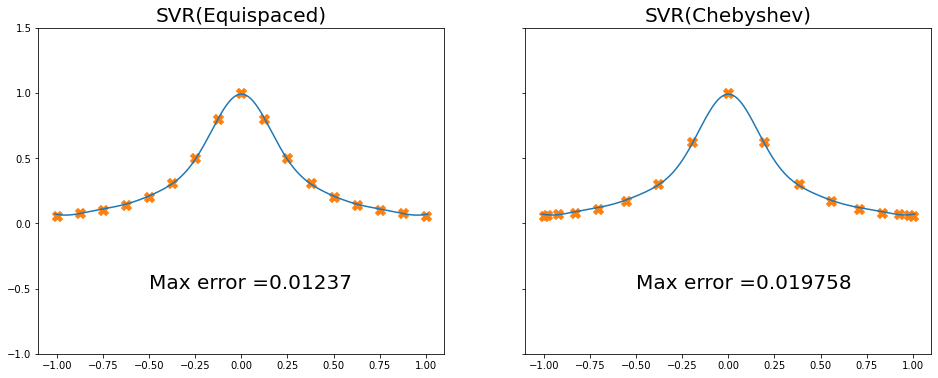

In [ ]:
plt.close()

from sklearn.svm import SVR

fig, ax = plt.subplots(1,2,sharex=True,sharey=True,figsize=(16,6))

N = 16
xx = np.linspace(-1.01,1.01,1000)
uu = 1 / (1 + 16 * xx**2)

for j in [1,2]:
  if j == 1:
    s = 'SVR(Equispaced)'
    x = -1 + 2 * np.arange(0,N+1,1)/N
    x2 = -1 + 2 * np.arange(0,16+1,1)/16
  else:
    s = 'SVR(Chebyshev)'
    x = np.cos(np.pi*np.arange(0,N+1,1)/N)
    x2 = np.cos(np.pi*np.arange(0,16+1,1)/16)
  u = 1 / (1 + 16 * x**2)
  u2 = 1 / (1 + 16 * x2**2)
  
  x = np.array(x).reshape(-1,1)
  xx = np.array(xx).reshape(-1,1)

  svm_reg = SVR(epsilon=0.01,gamma=20)
  svm_reg.fit(x,u)

  pp = svm_reg.predict(xx)

  error = max(uu-pp)

  ax[j-1].scatter(x2,u2,marker='o',s=20)
  ax[j-1].scatter(x,u,marker='X',s=100)
  ax[j-1].plot(xx,pp)
  ax[j-1].text(-0.5,-0.5,'Max error ='+str(round(error,6)),fontsize=20)
  ax[j-1].set_title(s,fontsize=20)

plt.xlim(-1-0.1,1+0.1)
plt.ylim(-1,1.5)

In [ ]:
from scipy.linalg import toeplitz
import pandas as pd

L = 8

df = pd.DataFrame()

for N in np.arange(6,36 +6,6):
  h = 2*np.pi/N
  x = h*np.arange(1,N+1,1) ; x = L*(x-np.pi)/np.pi
  column = [-np.pi**2/(3*h**2)-1/6]
  column = np.append(column,-0.5 * (-1)**np.arange(1,N,1)/np.sin(1/2*h*np.arange(1,N,1))**2)
  D2 = (np.pi/L)**2*toeplitz(column)
#  D2 = np.around(D2,30)
  eigenvalues = np.sort(np.linalg.eigvals(np.diag(x**2)-D2))
  df['N = '+str(N)] = eigenvalues[0:6]

df 

,N = 6,N = 12,N = 18,N = 24,N = 30,N = 36
0,0.461473,0.978137,0.999970,1.000000,1.0,1.0
1,7.494135,3.171605,3.000644,3.000000,3.0,3.0
2,7.720916,4.455935,4.992595,4.999998,5.0,5.0
3,28.832484,8.924529,7.039572,7.000025,7.0,7.0
4,29.037940,9.288546,8.814572,8.999765,9.0,9.0
5,64.494202,17.836071,11.462089,11.001484,11.0,11.0
